In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

In [5]:
train = datasets.MNIST("", train=True, download=True, 
                transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, 
                transform = transforms.Compose([transforms.ToTensor()]))

In [6]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
x,y = data[0][0], data[1][0]

print(x,y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

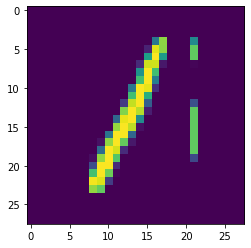

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x.view(28,28))

In [11]:
total = 0
counter = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter[int(y)] += 1
        total += 1
print(list(map(lambda x: x/total, counter.values())))
# data is roughly balanced

[0.09871666666666666, 0.11236666666666667, 0.0993, 0.10218333333333333, 0.09736666666666667, 0.09035, 0.09863333333333334, 0.10441666666666667, 0.09751666666666667, 0.09915]


In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
X = torch.rand((28,28))

In [15]:
output = net(X.view(1,28*28))
output

tensor([[-2.4057, -2.3311, -2.2866, -2.2854, -2.3012, -2.3534, -2.2225, -2.2857,
         -2.2391, -2.3282]], grad_fn=<LogSoftmaxBackward>)

In [16]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and lables
        X, y = data
        # 
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.3145, grad_fn=<NllLossBackward>)
tensor(0.0077, grad_fn=<NllLossBackward>)
tensor(0.0746, grad_fn=<NllLossBackward>)


In [20]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.967
